# Analysis of Foursquare Model Weight
# NYU - CUSP UDP Capstone
# Foursquare + TWITTER + CENSUS NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing
    - import Models Weight
    - Plot top 10 most important weights for every model
    
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [3]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Polygon', 'linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
weights_results = ['gent00_16.csv','Ongoing_adv_gent.csv',\
'pct_ch_hinc00_16.csv','pct_ch_medrent00_16.csv','pct_ch_medhval00_16.csv',\
'pct_ch_percol00_16.csv',
'Supergent16.csv']
weights_results

['gent00_16.csv',
 'Ongoing_adv_gent.csv',
 'pct_ch_hinc00_16.csv',
 'pct_ch_medrent00_16.csv',
 'pct_ch_medhval00_16.csv',
 'pct_ch_percol00_16.csv',
 'Supergent16.csv']

In [5]:
weights_df_list = []
for file in weights_results:
    print(file)
    temp = pd.read_csv('./Results_FQTWCENSUS/'+file)
    temp.rename(columns={'Unnamed: 0':'St_method'}, inplace=True)
    weights_df_list.append(temp)

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


In [6]:
binary_typs = []
for w in weights_results:
    print(w)
    binary_typs.append(w[:-4])
binary_typs

gent00_16.csv
Ongoing_adv_gent.csv
pct_ch_hinc00_16.csv
pct_ch_medrent00_16.csv
pct_ch_medhval00_16.csv
pct_ch_percol00_16.csv
Supergent16.csv


['gent00_16',
 'Ongoing_adv_gent',
 'pct_ch_hinc00_16',
 'pct_ch_medrent00_16',
 'pct_ch_medhval00_16',
 'pct_ch_percol00_16',
 'Supergent16']

In [7]:
weights_df_list[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index[::-1]

Index(['Class_Necessary_sum10', 'Checkins', 'local_tweets', 'Visits',
       'Class_Optional_sum10', 'total_tweets', 'unempden00', 'Rating_sum10',
       'hinc00', 'medhval00'],
      dtype='object')

In [8]:
top10_pd = pd.DataFrame()
for i, binary_target in enumerate(binary_typs):
    print(i, binary_target)
    for st_method in list(weights_df_list[i].index):
        print('st_method',st_method)
        pd_series_by_st_method = weights_df_list[i].loc[st_method]
        for k, variable in enumerate(pd_series_by_st_method[1:].abs().sort_values(ascending=False)[:10].index[::-1]):
            print(k,variable)
            top10_pd.loc[st_method,variable] = k
top10_pd

0 gent00_16
st_method 0
0 Class_Necessary_sum10
1 Checkins
2 local_tweets
3 Visits
4 Class_Optional_sum10
5 total_tweets
6 unempden00
7 Rating_sum10
8 hinc00
9 medhval00
st_method 1
0 Type_Cricket Ground_sum10
1 Type_Residential Building (Apartment / Condo)
2 Type_Luggage Store_sum10
3 Category_Mobility
4 unempden00
5 Type_Food
6 Type_Tapas Restaurant
7 Type_Stationery Store_sum10
8 carcommuters_00
9 per_rent_00
st_method 2
0 Type_Residential Building (Apartment / Condo)
1 Type_Luggage Store_sum10
2 Category_Mobility
3 Type_Herbs & Spices Store_sum10
4 unempden00
5 Type_Airport Tram
6 Type_Drugstore
7 Type_Stationery Store_sum10
8 carcommuters_00
9 per_rent_00
st_method 3
0 Type_Other Event
1 Type_Dosa Place
2 distance_to_Category_Civic
3 Type_Russian Restaurant
4 pag25up00
5 distance_to_Rating
6 Type_Police Station
7 Type_Comfort Food Restaurant
8 Type_Flea Market
9 Type_Mattress Store
st_method 4
0 percol00
1 Type_Hockey Arena_sum10
2 Type_Beer Garden
3 Type_Police Station
4 Type_Mat

2 distance_to_Type_Salad Place
3 Type_Restaurant
4 Type_Music School_sum10
5 neighbor_tweets
6 Type_Design Studio
7 popden00
8 Type_Boat Rental_sum10
9 medrent00
st_method 6
0 Type_Strip Club
1 distance_to_Checkins
2 distance_to_Type_Salad Place
3 Type_Restaurant
4 Type_Music School_sum10
5 neighbor_tweets
6 Type_Design Studio
7 popden00
8 Type_Boat Rental_sum10
9 medrent00
st_method 7
0 Type_Breakfast Spot
1 Type_Fish & Chips Shop
2 Type_Hot Dog Joint
3 distance_to_Category_Leisure
4 Type_Lingerie Store
5 Type_Gym
6 Type_Beer Garden
7 distance_to_Category_Personal care
8 distance_to_Type_Juice Bar
9 medrent00
st_method 8
0 Type_Breakfast Spot
1 Type_Fish & Chips Shop
2 Type_Hot Dog Joint
3 distance_to_Category_Leisure
4 Type_Lingerie Store
5 Type_Gym
6 Type_Beer Garden
7 distance_to_Category_Personal care
8 distance_to_Type_Juice Bar
9 medrent00
st_method 9
0 Type_Strip Club
1 distance_to_Checkins
2 distance_to_Type_Salad Place
3 Type_Restaurant
4 Type_Music School_sum10
5 neighbor_tw

,Class_Necessary_sum10,Checkins,local_tweets,Visits,Class_Optional_sum10,total_tweets,unempden00,Rating_sum10,hinc00,medhval00,...,distance_to_Category_Nutrition,Type_Sculpture Garden,distance_to_Category_Social,Type_Aquarium,Type_Acupuncturist,Type_Planetarium,Type_Museum,Type_Housing Development,Type_Train,Type_Corporate Coffee Shop_sum10
0,4.0,6.0,2.0,1.0,7.0,2.0,7.0,0.0,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,...,3.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,9.0,9.0,...,5.0,NaN,1.0,8.0,0.0,3.0,6.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,6.0
6,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,...,3.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,9.0,...,3.0,4.0,5.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,9.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(weights_results[3])
st_method = 8
print(st_method, (weights_df_list[3].loc[st_method][0]))
weights_df_list[3].loc[st_method][1:].abs().sort_values(ascending=False)[:10].index[::-1]

pct_ch_medrent00_16.csv
8 Logit_Minmaxed


Index(['Type_Breakfast Spot', 'Type_Fish & Chips Shop', 'Type_Hot Dog Joint',
       'distance_to_Category_Leisure', 'Type_Lingerie Store', 'Type_Gym',
       'Type_Beer Garden', 'distance_to_Category_Personal care',
       'distance_to_Type_Juice Bar', 'medrent00'],
      dtype='object')

hinc00                                102.0
percol00                               99.0
medhval00                              98.0
carcommuters_00                        83.0
medrent00                              79.0
distance_to_Category_Personal care     76.0
distance_to_Category_Leisure           70.0
pag25up00                              64.0
popden00                               51.0
Type_Tour Provider_sum10               48.0
dtype: float64


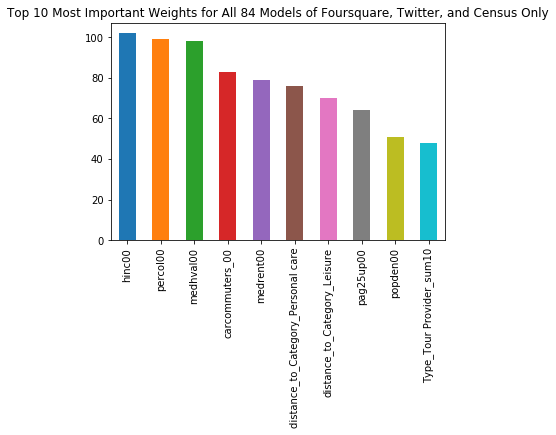

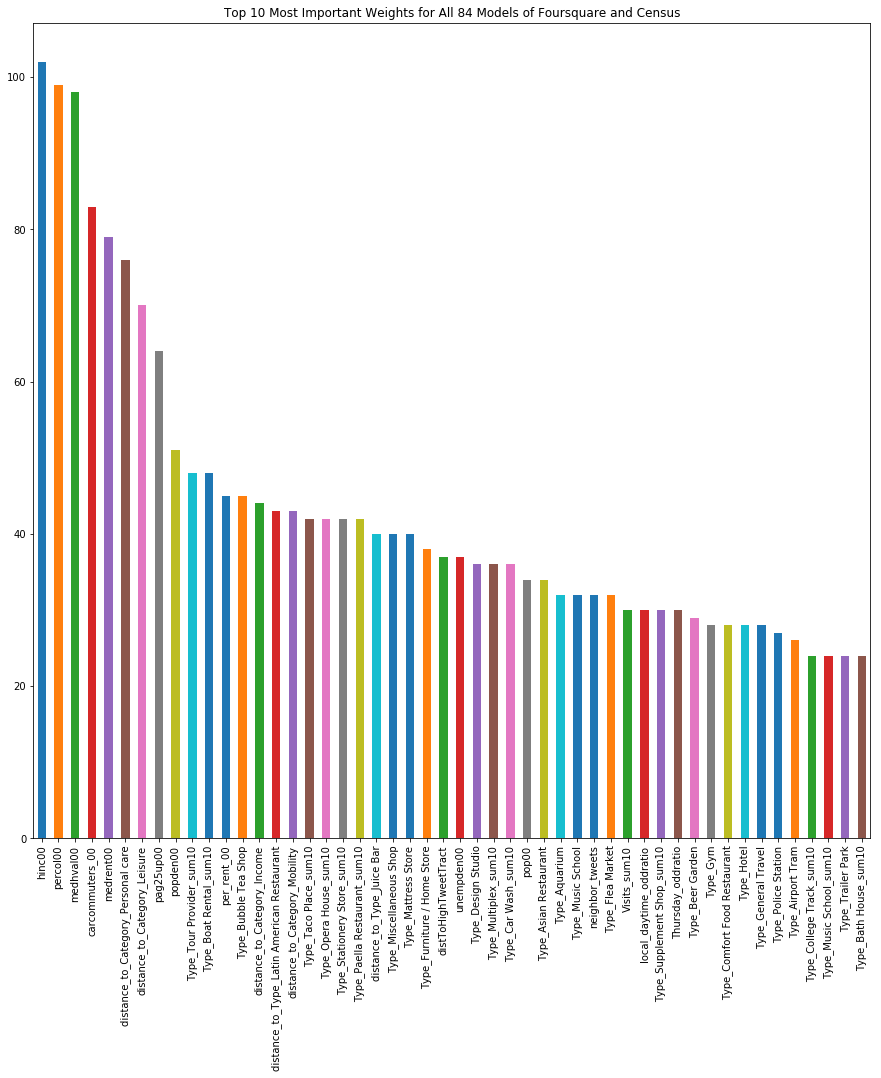

In [11]:
print(top10_pd.sum(axis=0).sort_values(ascending=False)[:10])
top10_pd.sum(axis=0).sort_values(ascending=False)[:10].plot(kind='bar', title = 'Top 10 Most Important Weights for All 84 Models of Foursquare, Twitter, and Census Only')
plt.show()
top10_pd.sum(axis=0).sort_values(ascending=False)[:50].plot(kind='bar', figsize = (15,15), title = 'Top 10 Most Important Weights for All 84 Models of Foursquare and Census')

In [52]:
# top10_pd = pd.DataFrame():
# for binary_variable in binary_variables:
#     top10_pd[binary_variable] = weights_df[0].loc[0][1:].abs().sort_values(ascending=False)[:10].index

Index(['Rating_sum10', 'Class_Optional_sum10', 'Visits',
       'Class_Necessary_sum10', 'Checkins', 'Category_Unknown_sum10',
       'Class__sum10', 'Users', 'Category_Consumption_sum10',
       'Category_Nutrition_sum10'],
      dtype='object')